## Import Libraries

In [2]:
import cv2
import numpy as np
import os
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

## Defining paths to folders

In [3]:
from google.colab import drive
drive.mount('/content/drive')
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/CW_Folder_UG'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

Mounted at /content/drive
['Report template.docx', '.DS_Store', 'CW_Dataset', '.ipynb_checkpoints', 'Models', 'test_functions.ipynb']


In [4]:
# Define the path to the image folder and label folder
train_image_folder = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE, 'CW_Dataset','CV2023_CW_Dataset','train','images')
train_label_folder = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE, 'CW_Dataset','CV2023_CW_Dataset','train','labels')
test_image_folder=os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE, 'CW_Dataset','CV2023_CW_Dataset','test','images')
test_label_folder=os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE, 'CW_Dataset','CV2023_CW_Dataset','test','labels')

## Loading images and labels


In [5]:
# Load the training images and labels
train_images = []
train_labels = []

for filename in os.listdir(train_image_folder):
    img = cv2.imread(os.path.join(train_image_folder, filename), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64)) # Resize the image to 64x64
    train_images.append(img)
    label_file = os.path.join(train_label_folder, f"{os.path.splitext(filename)[0]}.txt")
    with open(label_file, "r") as f:
        label = int(f.read().strip())
        train_labels.append(label)
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Load the testing images and labels
test_images = []
test_labels = []

for filename in os.listdir(test_image_folder):
    img = cv2.imread(os.path.join(test_image_folder, filename), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64)) # Resize the image to 64x64
    test_images.append(img)
    label_file = os.path.join(test_label_folder, f"{os.path.splitext(filename)[0]}.txt")
    with open(label_file, "r") as f:
        label = int(f.read().strip())
        test_labels.append(label)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [6]:
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (2394, 64, 64)
Train labels shape: (2394,)
Test images shape: (458, 64, 64)
Test labels shape: (458,)


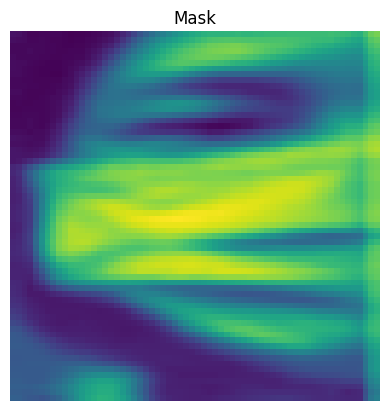

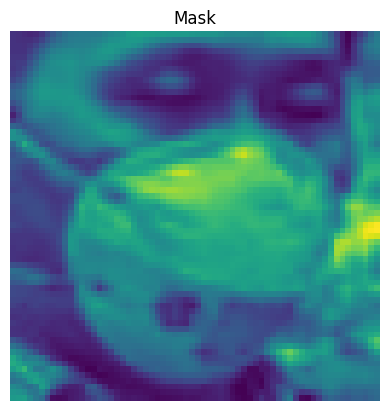

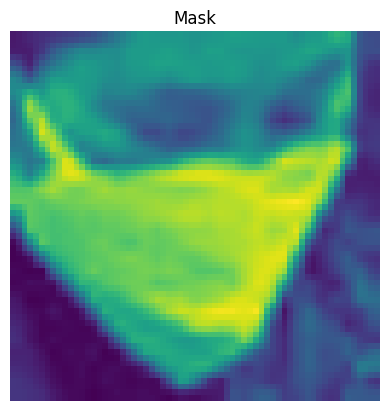

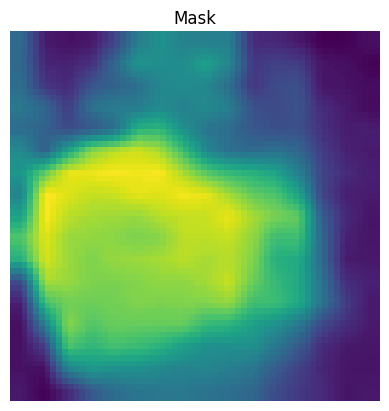

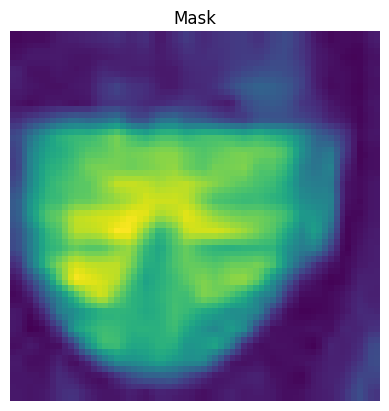

In [7]:
# Define a function to visualize images
def show_image(image, label):
    label_map = {0: "No mask", 1: "Mask", 2: "Improper mask"}
    plt.imshow(image)
    plt.title(label_map[label])
    plt.axis("off")
    plt.show()

# Show the first 5 images with their labels from the training set
for i in range(5):
    show_image(train_images[i], train_labels[i])

## Extracting features from images using HOG

In [15]:
# Define the HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (3, 3)

# Extract the HOG features from the training images
train_hog_features = []
for img in train_images:
    hog_features = hog(img, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block)
    train_hog_features.append(hog_features)
train_hog_features = np.array(train_hog_features)

# Extract the HOG features from the testing images
test_hog_features = []
for img in test_images:
    hog_features = hog(img, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block)
    test_hog_features.append(hog_features)
test_hog_features = np.array(test_hog_features)

## Train the MLP classifier


In [16]:
# Train the MLP classifier on the HOG features
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
mlp.fit(train_hog_features, train_labels)

MLPClassifier(max_iter=500)

## Save the model using joblib

In [14]:
import joblib
joblib.dump(mlp, 'drive/MyDrive/Colab Notebooks/CW_Folder_UG/Models/MLP+HOG.joblib')

['drive/MyDrive/Colab Notebooks/CW_Folder_UG/Models/MLP+HOG.joblib']

## Test the model

In [17]:
# Evaluate the MLP classifier on the testing set
accuracy = mlp.score(test_hog_features, test_labels)
print(f"Accuracy: {accuracy}")
# Generate predictions for the test set
test_predictions = mlp.predict(test_hog_features)

Accuracy: 0.8580786026200873


## Evaluation


In [18]:
# Create a confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(test_labels, test_predictions)
print(f"Confusion matrix:\n{cm}")

Confusion matrix:
[[ 30  19   2]
 [ 26 355   7]
 [  0  11   8]]


In [19]:
report = classification_report(test_labels, test_predictions)
print(f"Classification report:\n{report}")

Classification report:
              precision    recall  f1-score   support

           0       0.54      0.59      0.56        51
           1       0.92      0.91      0.92       388
           2       0.47      0.42      0.44        19

    accuracy                           0.86       458
   macro avg       0.64      0.64      0.64       458
weighted avg       0.86      0.86      0.86       458

